In [1]:
import gempy as gp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pyvista as pv
data_path = 'D:\sciebo\geoblk\work-flow\geoblocks-workflow\examples\example_data'

No module named 'osgeo'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\ict\anaconda\envs\gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
salt_dome = gp.create_model('salt_dome_s32')
gp.init_data(salt_dome, [-2000, 10000., -5000, 6000., 0, 5000.], [50, 50, 50],
             path_o= data_path + "\salt_dome_s37_lower_mid_right\salt_dome_s37_lower_mid_right_O.csv",
             path_i= data_path + "\salt_dome_s37_lower_mid_right\salt_dome_s37_lower_mid_right_I.csv",
             default_values=True)

Active grids: ['regular']


salt_dome_s32  2023-02-15 16:53

In [3]:
salt_dome.surfaces

,surface,series,order_surfaces,color,id
0,S 37 lower mid-right,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


In [4]:
gp.get_data(salt_dome, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,2250,2750,800,-7.071068e-01,9.999567e-13,0.707107,0.01,S 37 lower mid-right
1,3250,2750,800,4.226183e-01,1.000026e-12,0.906308,0.01,S 37 lower mid-right
2,1250,2750,400,-5.735764e-01,9.999649e-13,0.819152,0.01,S 37 lower mid-right
3,5200,2750,400,4.226183e-01,1.000026e-12,0.906308,0.01,S 37 lower mid-right
4,2750,2300,850,1.000000e-12,-2.588190e-01,0.965926,0.01,S 37 lower mid-right


In [5]:
gp.map_stack_to_surfaces(salt_dome,
                         {
                          "Strat_Series_1": ('S 37 lower mid right'),
                          "Basement":('basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,S 37 lower mid-right,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


In [6]:
salt_dome.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


D:\ict\anaconda\envs\gempy\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
D:\ict\anaconda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


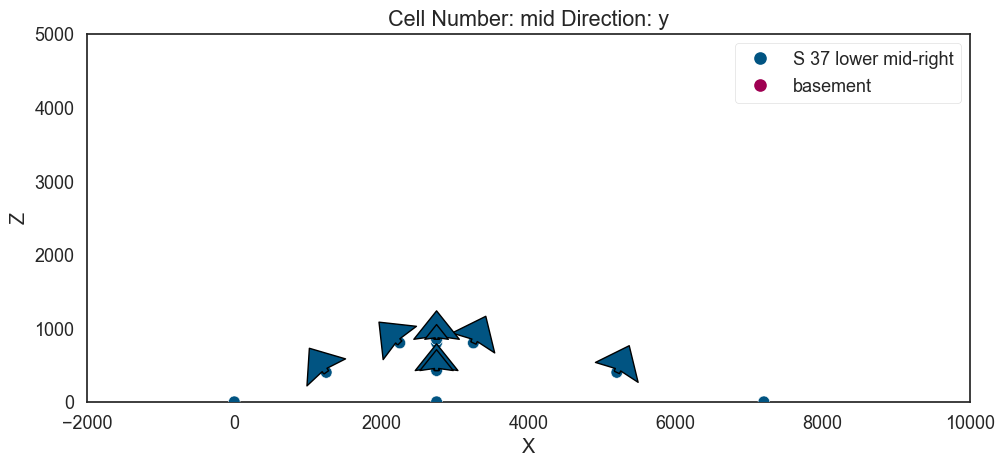

In [7]:
plot = gp.plot_2d(salt_dome, show_lith=False, show_boundaries=False)
plt.show()

D:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:475: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
D:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


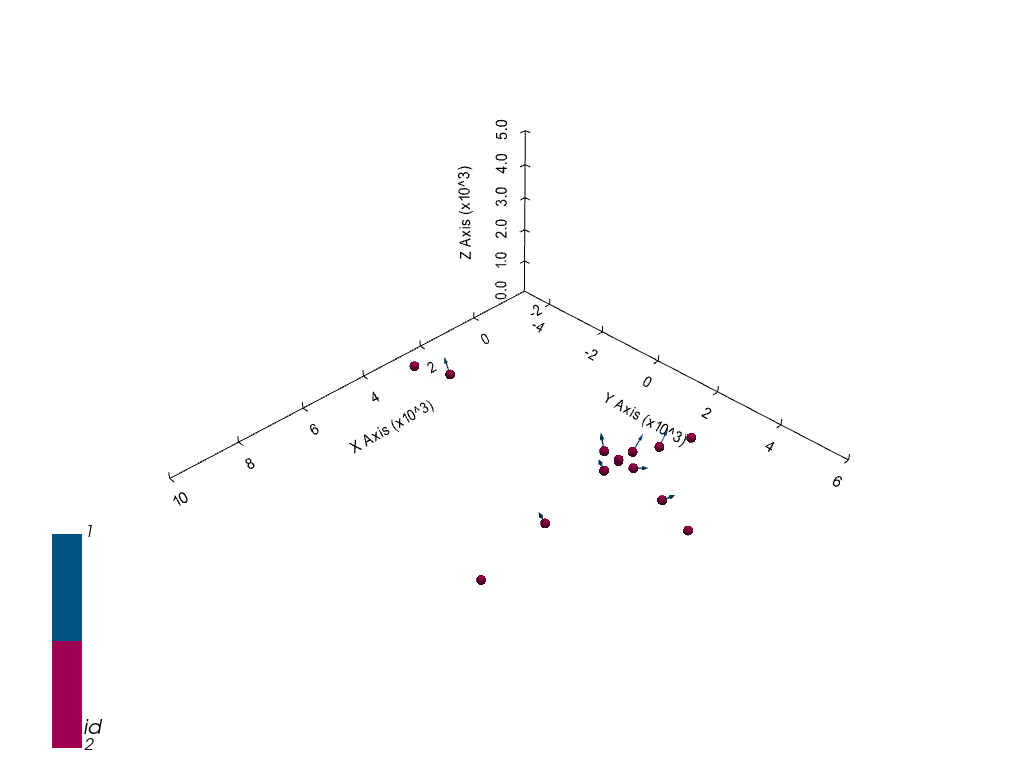

In [8]:
gpv = gp.plot_3d(salt_dome, image=False, plotter_type='basic',notebook=True)

In [9]:
gp.set_interpolator(salt_dome,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              17029.386366
$C_o$            6904761.904762
drift equations          [3, 3]


In [10]:
sol = gp.compute_model(salt_dome)

D:\ict\anaconda\envs\gempy\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
D:\ict\anaconda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


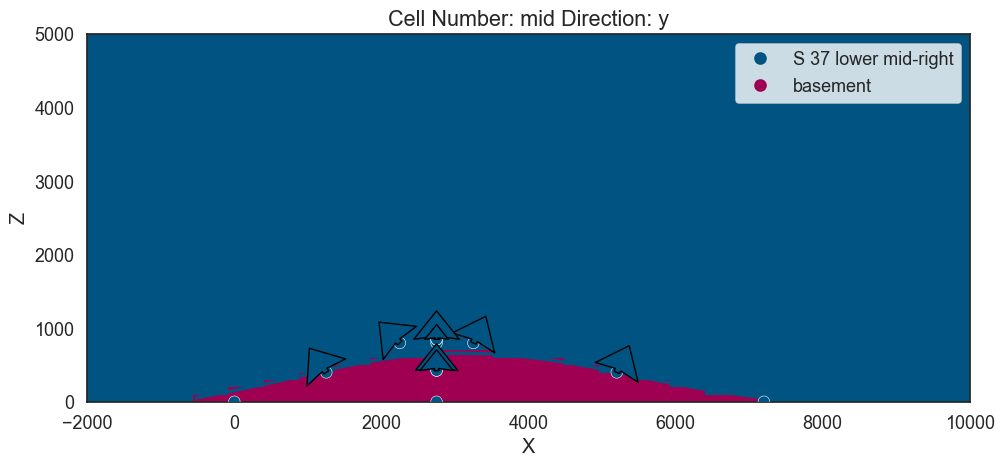

In [11]:
gp.plot_2d(salt_dome, show_data=True)
plt.show()

D:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
D:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:475: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
D:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


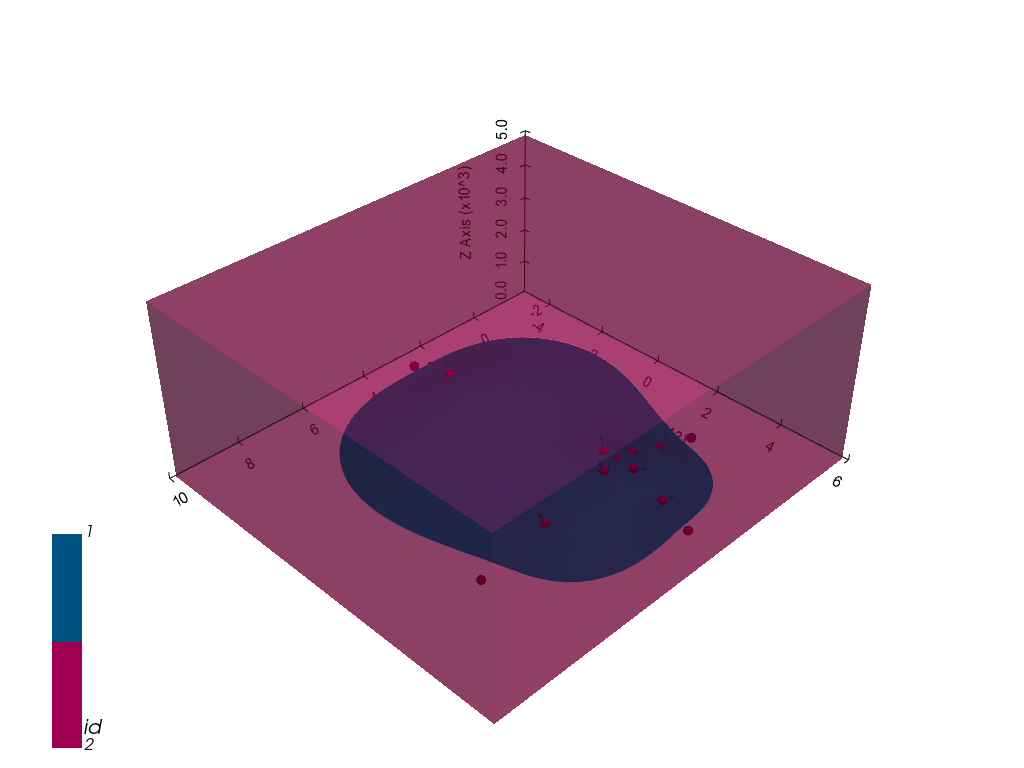

In [12]:
gp.plot_3d(salt_dome,plotter_type='basic',notebook=True)

In [13]:
gp.plot_3d(salt_dome,plotter_type='basic')

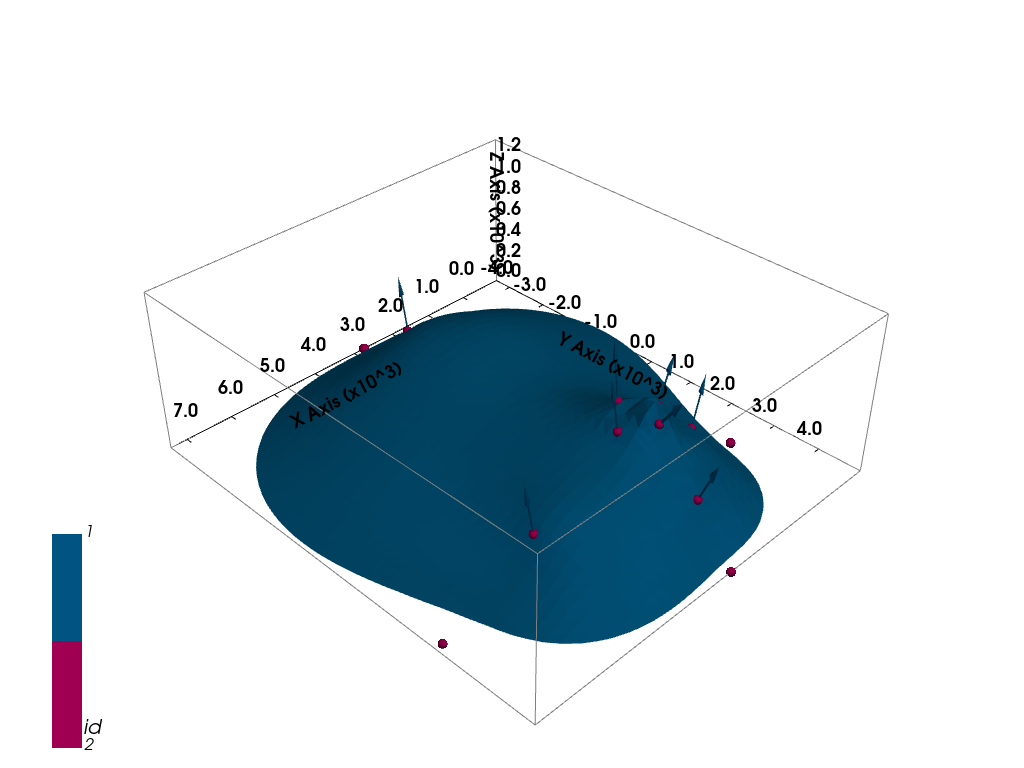

In [14]:
from gempy.plot.vista import GemPyToVista
gpv = GemPyToVista(salt_dome)
gpv.plot_surface_points()
gpv.plot_orientations()
gpv.plot_surfaces()
gpv.p.add_bounding_box()
gpv.p.set_scale(zscale=2.5)
gpv.p.notebook='True'
gpv.p.show()